<a href="https://colab.research.google.com/github/Diego875621/Data_Science/blob/main/Analise%20de%20Dados%20-%20Airbnb%20-%20Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

# <center>  Análise dos Dados do Airbnb - *Toronto*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Através de sua plataforma inovadora a Airbnb conecta pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, fornecendo uma hospedagem diferente do método tradicional.

Desafiando as tradicionais redes hoteleiras, no final de 2018, a Startup já havia **hospedado mais de 300 milhões de pessoas** ao redor de todo o mundo.


Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.




**Neste *notebook*, iremos analisar os dados referentes à cidade Toronto, e ver quais insights podem ser extraídos a partir de dados brutos.**


## 1 - Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2021-12-05/visualisations/listings.csv", index_col="id")
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64590,-79.42423,Entire home/apt,469,28,7,2017-12-04,0.09,1,0,0,NaN
8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room,96,180,169,2013-08-27,1.50,2,365,0,NaN
23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69805,-79.45411,Private room,72,28,217,2018-10-10,1.73,2,365,0,NaN
27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,South Riverdale,43.66884,-79.32725,Entire home/apt,45,365,26,2011-06-25,0.21,1,280,0,NaN
30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64015,-79.37625,Entire home/apt,128,180,1,2010-08-11,0.01,2,365,0,NaN


## 2 - Análise dos Dados

A partir dessa etapa, vamos começar a analisar os dados de maneira inicial e ir aprofundado a medida que avançamos neste artigo. 

Abaixo há um dicionário das variáveis para facilitar o seu entendimento.

**Dicionário das variáveis**

*   `id` - Número ID gerado para identificar o imóvel
*   `name` - Nome da propriedade descrita 
*   `host_id` - Número ID do proprietário (anfitrião) 
*   `host_name` - Nome do proprietário
*   `price` - Preço do local
*   `neighbourhood_group` - Coluna sem valor válido
*   `neighbourhood` - Bairro do local
*   `room_type` - Tipo de acomodação
*   `minimum_nights` - Mínimo de noites para se reversar
*   `number_of_reviews` - Número de avaliações 
*   `last_review` - Data da última avaliação
*   `reviews_per_month` - Número de avaliações por mês
*   `calculated_host_listings_count` - Número de imóveis do mesmo proprietário
*   `availability_365` - Número de dias disponíveis em 1 ano 
*   `license` - Número de licença da propriedade
*   `latitude` - Coordenada da Latitude  do local
*   `longitude` - Coordenada da Longitude  do local




Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64590,-79.42423,Entire home/apt,469,28,7,2017-12-04,0.09,1,0,0,NaN
8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64080,-79.37673,Private room,96,180,169,2013-08-27,1.50,2,365,0,NaN
23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69805,-79.45411,Private room,72,28,217,2018-10-10,1.73,2,365,0,NaN
27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,South Riverdale,43.66884,-79.32725,Entire home/apt,45,365,26,2011-06-25,0.21,1,280,0,NaN
30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64015,-79.37625,Entire home/apt,128,180,1,2010-08-11,0.01,2,365,0,NaN


### **2-1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Dando continuidade, é possível identificar a quantidade de entradas que o conjuto de dados possui e também ver os tipos de cada coluna.

Lembrando que essa é versão resumida dos dados. Para uma análise mais profunda devemos baixar o arquivo completo do Airbnb. 

Com os códigos abaixos podemos ver que o nosso dataset tem 15261 entradas e 17 tipos de variáveis

In [4]:
# Volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# 5 primeiras entradas do dataset
df.dtypes

Entradas:	 15261
Variáveis:	 17



name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **2-2. Qual a porcentagem de valores ausentes no *dataset*?**

Pode-se estimar a qualidade de um dataset analisando o grau de limpeza de dados. 
Muitas vezes encontramos dataset com valores ausentes. Esse valores nulos podem ser significativos ou não quando comparamos ao total de entradas.

A partir da listagem abaixo percebemos que a coluna `neighbourhood_group` é insignificante para nossa analíse, pois não apresenta nenhum valor válido. Logo podemos retirar esse dado, utilizando `drop`, pois não vai impactar nossa análise. 

Em seguida na lista de dados ausentes, temos `license` com 66.86%, `reviews_per_month` e `last_review`, ambos com coincidentes 22.84%.

In [5]:
# Variáveis por ordem decrescente e seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

neighbourhood_group               100.000000
license                            66.863246
last_review                        22.842540
reviews_per_month                  22.842540
host_name                           0.072079
name                                0.006553
longitude                           0.000000
room_type                           0.000000
host_id                             0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
latitude                            0.000000
neighbourhood                       0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
price                               0.000000
dtype: float64

In [6]:
#Retirando o neighbourhood_group do dataframe
df_clean1 = df.drop("neighbourhood_group", axis = 1)

In [7]:
#Checando
df_clean1.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,
1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469,28,7,2017-12-04,0.09,1,0,0,NaN
8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,Waterfront Communities-The Island,43.64080,-79.37673,Private room,96,180,169,2013-08-27,1.50,2,365,0,NaN
23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,Briar Hill-Belgravia,43.69805,-79.45411,Private room,72,28,217,2018-10-10,1.73,2,365,0,NaN
27423,Executive Studio Unit- Ideal for One Person,118124,Brent,South Riverdale,43.66884,-79.32725,Entire home/apt,45,365,26,2011-06-25,0.21,1,280,0,NaN
30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,Waterfront Communities-The Island,43.64015,-79.37625,Entire home/apt,128,180,1,2010-08-11,0.01,2,365,0,NaN


Devemos notar também que a coluna `license`, ou seja, o ID de permissão/habilitação do imóvel, apresenta um número significante de valores ausentes.
Porém, ao analisar a contagem dos valores dessa coluna, percebemos que a maioria dos imóveis são isentos de licença. 

Como hipótese, podemos extrapolar que todos os outros imóveis com valores ausentes também são isentos, pois funcionaram normalmente e esses foram aprovados pelo Airbnb da mesma forma que os outros.

Assim, podemos preencher os dados ausentes como isentos, ou seja: `Exempt`, utilizando a função `fillna`.

In [8]:
df.license.value_counts()

Exempt                    194
Approved by government     64
STR-2011-FZCKVD            15
STR-2011-HRWKVL            15
STR-2009-FSHDPC            15
                         ... 
STR-2012-HSKVHL             1
STR-2101-HHRXVJ             1
STR-2102-GLJRVG             1
STR-2010-FWFXPD             1
STR-2013-KFGAWS             1
Name: license, Length: 3414, dtype: int64

In [9]:
#Preenchendo os valores ausentes de License com "Exempt"
df_clean = df_clean1.fillna({"license":"Exempt"})

In [10]:
#Os valores ausentes de "license" agora estão zerado
df_clean.isnull().sum()

name                                 1
host_id                              0
host_name                           11
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       3486
reviews_per_month                 3486
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                              0
dtype: int64

In [11]:
#Checando
df_clean.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,
1419,Beautiful home in amazing area!,1565,Alexandra,Little Portugal,43.64590,-79.42423,Entire home/apt,469,28,7,2017-12-04,0.09,1,0,0,Exempt
8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,Waterfront Communities-The Island,43.64080,-79.37673,Private room,96,180,169,2013-08-27,1.50,2,365,0,Exempt
23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,Briar Hill-Belgravia,43.69805,-79.45411,Private room,72,28,217,2018-10-10,1.73,2,365,0,Exempt
27423,Executive Studio Unit- Ideal for One Person,118124,Brent,South Riverdale,43.66884,-79.32725,Entire home/apt,45,365,26,2011-06-25,0.21,1,280,0,Exempt
30931,Downtown Toronto - Waterview Condo,22795,Kathie & Larry,Waterfront Communities-The Island,43.64015,-79.37625,Entire home/apt,128,180,1,2010-08-11,0.01,2,365,0,Exempt


### **2-3. Qual o tipo de distribuição das variáveis? Quais são os `outliers`?** 

A identificação da distribuição das variáveis pode ser vista a partir dos histogramas abaixos.

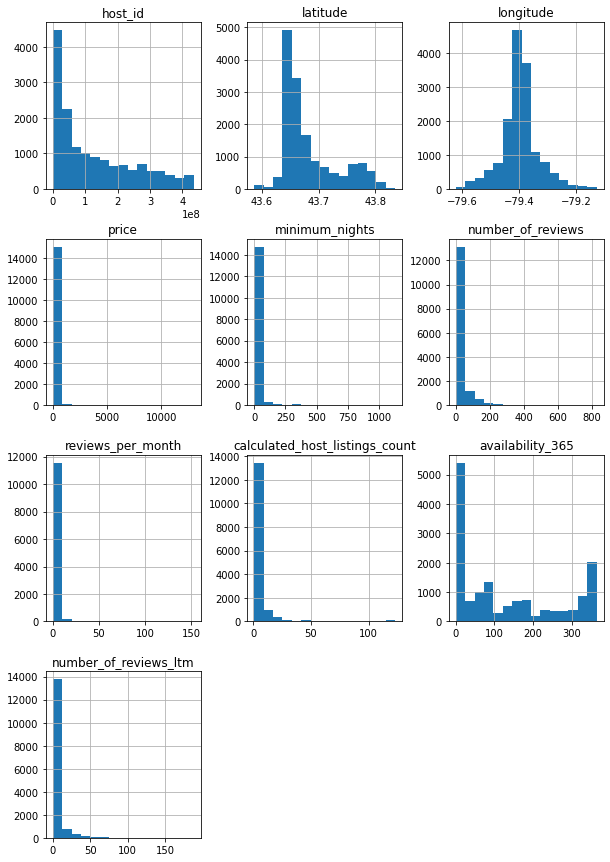

In [12]:
# Histograma das variáveis numéricas
df_clean.hist(bins=15, figsize=(10,15));

In [13]:
# Descrição estatística resumida do dataset
df_clean[['price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,15261.000000,15261.000000,15261.000000,11775.000000,15261.000000,15261.000000
mean,155.451674,26.310792,26.238320,1.633137,5.178101,131.505799
std,371.197012,40.175750,53.502878,4.316384,13.103014,134.985795
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,67.000000,5.000000,1.000000,0.160000,1.000000,0.000000
50%,101.000000,28.000000,5.000000,0.550000,1.000000,87.000000
75%,165.000000,28.000000,26.000000,1.630000,4.000000,251.000000
max,13000.000000,1125.000000,828.000000,153.000000,123.000000,365.000000


**Detectando e lidando com outliers**

A partir da análise dos histogramas, é possível perceber que certos valores muito distantes dos outros valores, ou seja, temos *outliers*, especialmente nas variáveis `price` e `minimum_nights` pois estas têm maior peso nessa análise.


Além dos histogramas, podemos usar de ferramentas estatísticas como `.describe()` e observar o desvio padrão `std` e os valores que correspondem a `75%` dos dataset, e também a partir de gráficos de caixa.


A variável price possui 75% dos valores abaixo de 165, no entanto seu valor máximo é 13000, enquanto a variável `minimum_nights`, da mesma maneira possui 75% dos valores abaixo de 28, no entanto seu valor máximo é 1125.

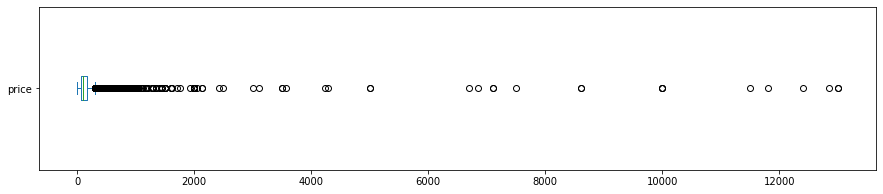


price: valores acima de 1000
109 entradas
0.71%


In [14]:
# "price" Outliers
df_clean.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Valores acimas de 1000
price = len(df_clean[df_clean.price > 1000])
pricepercent = (len(df_clean[df_clean.price > 1000]) / df_clean.shape[0] * 100)

print("\nprice: valores acima de 1000")
print(f'{price} entradas')
print(f'{pricepercent:.2f}%')

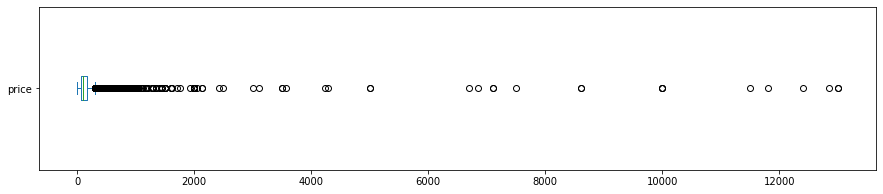


minimum_nights: valores acima de 150
240 entradas
1.57%


In [15]:
# "minimum_nights" Outliers
df_clean.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Valores acimas de 150
mnights = len(df_clean[df_clean.minimum_nights > 150])
mnightspercent = (len(df_clean[df_clean.minimum_nights > 150]) / df_clean.shape[0]*100)

print("\nminimum_nights: valores acima de 150")
print(f'{mnights} entradas')
print(f'{mnightspercent:.2f}%')



---


A partir dos exemplos acima, podemos ver que:

* price: somente 0.71% equivalem a valores maiores que 1000 e;
* minimum_nights: somente 1.57% equivalem a valores maiores que 150.

Dessa forma, podemos limpar o `Dataframe`e plotar novamente considerando esse limite arbritário para as duas variáveis.

Após a limpeza, percebe-se uma distribuição mais visível, com a variação `price` mais frequente no valor de 0-400. Já a variável `minimum_nights` tem maior distribuição entre 0-28, aproximadamente.


---



In [16]:
# Limpeza dos dados e plot do histograma novo
df_clean.drop(df_clean[df_clean.price > 1000].index, axis = 0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 150].index, axis = 0, inplace=True)

df_clean.hist(["price", "minimum_nights"], bins = 15, figsize=(10, 5));

### **2-4. Qual a média dos preços de aluguel?**

A média dos preços dos alugueis foi aproximadamente $155.43 

In [18]:
# Média da coluna `price`
mean = df_clean.price.mean()
print(f'Média dos preços: {mean:.3f}')

Média dos preços: 135.052


### **2-5. Qual a correlação existente entre as variáveis**

A correlação mede o grau de relação 
entre duas coisas - nesse caso, a relação entre as variáveis.

Essa medida pode ser mensurada pelo coeficiente de correlação. Para isso, podemos:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, com a ajuda da biblioteca `seaborn`

  ->  **Nenhuma das variáveis apresentou correlação significativa**

In [19]:
df_clean.columns


Index(['name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [20]:
# Matriz de correlação
corr = df_clean[['price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']].corr()
# Mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.074410,-0.007342,0.023834,0.014915,0.072668
minimum_nights,-0.074410,1.000000,-0.170025,-0.268376,0.010086,-0.041550
number_of_reviews,-0.007342,-0.170025,1.000000,0.292355,-0.068130,0.010855
reviews_per_month,0.023834,-0.268376,0.292355,1.000000,-0.018092,0.033614
calculated_host_listings_count,0.014915,0.010086,-0.068130,-0.018092,1.000000,0.145436
availability_365,0.072668,-0.041550,0.010855,0.033614,0.145436,1.000000


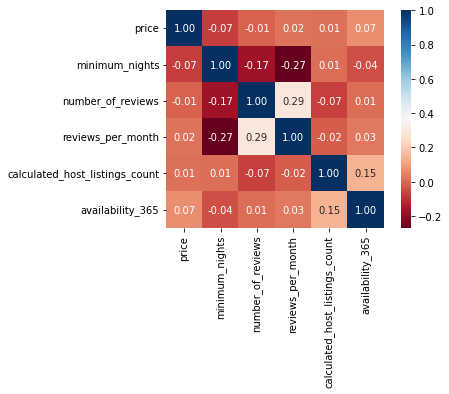

In [21]:
# Heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **2-6. Qual o tipo de imóvel mais alugado no Airbnb?**

Os tipos de imoveis mais alugados foram:
* 1º Casa/Apartamentos inteiros (65,9%)
* 2º Quartos Privados (32,7%)
* 3º Quarto compartilhado (1,2%)
* 4º Quarto de hotel (0,1%)

In [22]:
# Quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts().sort_values(ascending=False)

Entire home/apt    9770
Private room       4939
Shared room         188
Hotel room           20
Name: room_type, dtype: int64

In [23]:
# Porcentagem de cada tipo de imóvel disponível
print(df_clean.room_type.value_counts().sort_values(ascending=False) / df_clean.shape[0] * 100)

Entire home/apt    65.495743
Private room       33.109875
Shared room         1.260307
Hotel room          0.134075
Name: room_type, dtype: float64


### **2-7. Qual a localidade mais cara do dataset?**

A função `groupby()` pode nos ajudar a visualizar uma variável em função da outra. 
Nesse exemplo vamos comparar os bairros com o preço da localização de cada um. Obtemos que as principais 10 localidades mais caras estão apresentadas abaixo, ordenadas do maior preço para o menor preço.

É também possível verificar o número de entradas e a homogeneidade dos dados de cada bairro.

                              

1. Annex
2. Forest Hill South  
3. Palmerston-Little Italy              
4. Bridle Path-Sunnybrook-York Mills    
5. Rosedale-Moore Park                  
6. Waterfront Communities-The Island    
7. Princess-Rosethorn                  
8. Clairlea-Birchmount                  
9. Kingsway South                      
10. Casa Loma


In [24]:
# Média de preços por bairros
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Bridle Path-Sunnybrook-York Mills    237.769231
Princess-Rosethorn                   216.714286
Kingsway South                       207.800000
Rosedale-Moore Park                  197.820896
Waterfront Communities-The Island    192.026495
Edenbridge-Humber Valley             186.812500
Lawrence Park South                  180.454545
Forest Hill South                    176.954545
Leaside-Bennington                   175.574468
Niagara                              174.421233
Name: price, dtype: float64

In [30]:
# Homogeneidade dos bairros
print(df_clean[df_clean.neighbourhood == "Clairlea-Birchmount"].shape)

df_clean[df_clean.neighbourhood == "Clairlea-Birchmount"]

(80, 16)


,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,
6291995,Basement in Scarborough South-West.,32715101,Michael,Clairlea-Birchmount,43.71606,-79.27473,Entire home/apt,55,28,68,2018-06-23,0.88,1,0,0,Exempt
7330122,Beautiful apartment in East Toronto,7186266,Shade,Clairlea-Birchmount,43.71061,-79.29461,Entire home/apt,150,28,2,2016-07-31,0.03,1,0,0,Exempt
8974679,Cozy Bedroom with a queen size bed.,32553627,Igor,Clairlea-Birchmount,43.71856,-79.29632,Private room,50,28,0,NaN,NaN,1,0,0,Exempt
13167226,Cozy bedroom walkable to subway,67345900,Chong,Clairlea-Birchmount,43.70473,-79.27655,Private room,50,28,7,2017-08-27,0.11,2,0,0,Exempt
13310015,Beautiful Room Subway 20min to Downtown Toronto,75210814,Wayne,Clairlea-Birchmount,43.70904,-79.27723,Private room,150,28,0,NaN,NaN,1,0,0,Exempt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53192781,🎉Fully private single room,174967435,Mahmud,Clairlea-Birchmount,43.71032,-79.29297,Private room,65,1,1,2021-11-14,1.00,14,338,1,Exempt
53216719,Master bedrm_Queen_Private Washrm_walk to Subway,114052806,Jessie,Clairlea-Birchmount,43.71370,-79.27854,Private room,45,28,0,NaN,NaN,10,346,0,Exempt
53297195,private single room (fully private),174967435,Mahmud,Clairlea-Birchmount,43.70902,-79.29153,Private room,55,1,0,NaN,NaN,14,287,0,STR-2101-FGMDVB


A partir dos dados de londitude e latitude, nós podemos plotar um gráfico de dispersão. Para isso, devemos considera que `x=longitude` e `y=latitude`.

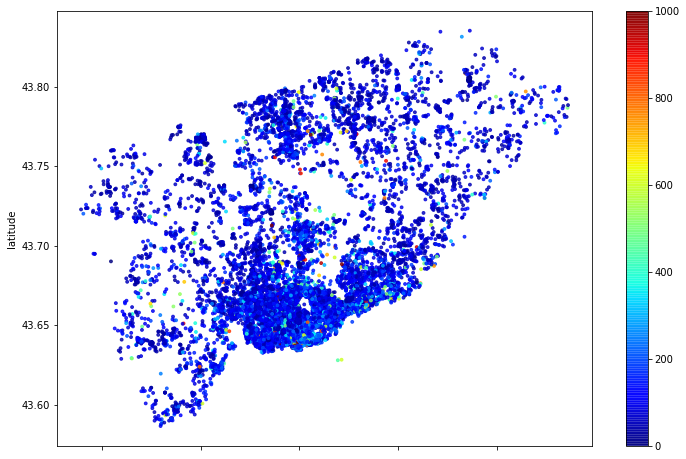

In [25]:
# Plot latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha = 0.8, c=df_clean['price'],
              s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **2-8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

A média do mínimo de noites foi de 22.4

In [28]:
# média da coluna `minimum_nights`
mean_mn = df_clean.minimum_nights.mean()
print(f'Média do mínimo de noites {mean_mn:.1f}')

Média do mínimo de noites 22.4


## 3 - Conclusões


A partir dessa análise, podemos concluir que:

* As variáveis não são correlacionaveis
* Há valores ausentes principalmente em `neighbourhood_group` (100%), `license` (66.86%), `reviews_per_month`(22.84%) e `last_review`(22.84%)
* A média do preço é 135.02 e a média do número mínimo de noites é 22.4

* As cinco localidades mais caras foram:Annex,Forest Hill South, Palmerston-Little Italy, Bridle Path-Sunnybrook-York Mills e Rosedale-Moore Park .

* O tipo de imóvel mais alugado é casa/apartamento inteiro (65,9%), seguido de quarto individual (32,7%)
* Há uma grande quantidade de outliers nas variáveis `price` e `minimum_nights` que caso não verificadas, podem distorcer as informações estatística de certos atributos

Essa foi apenas uma análise superficial, pois foi usada a versão resumida dos dados. Para se aprofundar numa análise posterior, é recomendado utilizar a versão completa dos dados.